In [82]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.__version__
%matplotlib inline




In [2]:
# loan data table dictionary
data_dict = pd.read_excel('data/data_dict.xlsx')
data_dict.head(50)


,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


In [3]:
# Loan 2015
loan_2015 = pd.read_csv('data/2015.csv')


/Users/tedcheng/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
# Data Exploration
# 1. Source of loans (who take out loans with Lending Club)
# - Who take out them? By State/Employment

# 2. Loan stats (What are these loans like?/What characteristics)
# - Loan Purpose/Grading/Interest Rate/Amount/Status/Term(length)
# - Any of these things by State/Employment Status

# 3. Further Questions
# Grading vs. Interest Rate
# Grading vs. Default Rate

# Loan Profile comparison w/ other financial institutions

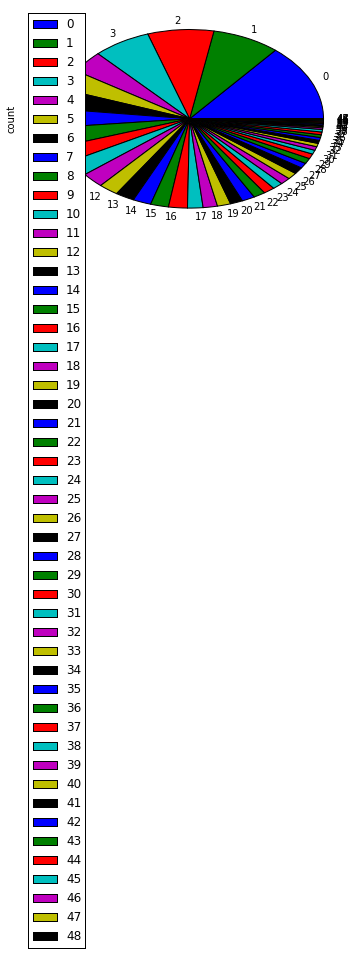

In [98]:
# 1. Source of loan
# - By State
aggregations = {
    'id': 'count',
    'loan_amnt': 'sum'
}

renamed_columns = {
    'loan_amnt':'total_loan_amnt', 
    'id': 'count'
}

loan_by_state = loan_2015.groupby('addr_state').agg(aggregations).rename(columns=renamed_columns)
loan_by_state = loan_by_state.sort(['total_loan_amnt'], ascending = False)
loan_by_state.reset_index()[['addr_state', 'count']].plot(kind='pie', y='count')

In [7]:
# - By Employment Title

loan_by_emp_title = loan_2015.groupby('emp_title').agg(aggregations).rename(columns=renamed_columns)
loan_by_emp_title = loan_by_emp_title.sort(['total_loan_amnt'], ascending = False)
loan_by_emp_title.head(50)

,total_loan_amnt,count
emp_title,,
Teacher,80348500,5561
Manager,74431275,4658
Owner,45048550,2586
Registered Nurse,36831150,2155
RN,35915525,2163
Supervisor,30518350,2047
Project Manager,29190800,1630
Sales,27538350,1800
Director,26452625,1306


In [10]:
# - By Employment Length

def length_transform(x):
    length = x['emp_length']
    if length in ['< 1 year', '1 year', '2 years', '3 years']:
        return "0-3 years"
    elif length in ['4 years', '5 years', '6 years', '7 years']:
        return "4-7 years"
    elif length in ['8 years', '9 years', '10 years', '10+ years']:
        return "8-10+ years"
    else:
        return "n/a"

loan_2015['emp_length_bracket'] = loan_2015.apply(lambda row : length_transform(row), axis = 1)
loan_2015




,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_bracket
0,60823020,64864837,25000,25000,25000,60 months,7.89%,505.60,A,A5,...,NaN,NaN,NaN,NaN,NaN,105500,NaN,NaN,NaN,8-10+ years
1,60841114,64882855,16000,16000,15950,60 months,23.99%,460.20,F,F3,...,NaN,NaN,NaN,NaN,NaN,50200,NaN,NaN,NaN,4-7 years
2,60812861,64844688,12000,12000,12000,36 months,12.29%,400.24,C,C1,...,NaN,NaN,NaN,NaN,NaN,16700,NaN,NaN,NaN,8-10+ years
3,60972604,65014382,10000,10000,10000,36 months,16.99%,356.48,D,D3,...,NaN,NaN,NaN,NaN,NaN,27900,NaN,NaN,NaN,0-3 years
4,59493104,63426885,8075,8075,8025,36 months,17.57%,290.20,D,D4,...,NaN,NaN,NaN,NaN,NaN,9050,NaN,NaN,NaN,0-3 years
5,60801810,64853583,12300,12300,12300,60 months,24.99%,360.95,F,F4,...,NaN,NaN,NaN,NaN,NaN,12400,NaN,NaN,NaN,0-3 years
6,61016609,65115331,6000,6000,6000,36 months,13.99%,205.04,C,C4,...,NaN,NaN,NaN,NaN,NaN,23700,NaN,NaN,NaN,8-10+ years
7,60802603,64854400,7000,7000,7000,36 months,13.99%,239.21,C,C4,...,NaN,NaN,NaN,NaN,NaN,7100,NaN,NaN,NaN,0-3 years
8,60832734,64874533,25000,25000,24950,60 months,17.86%,632.94,D,D5,...,NaN,NaN,NaN,NaN,NaN,29300,NaN,NaN,NaN,8-10+ years
9,60045257,63989975,3000,3000,3000,36 months,19.99%,111.48,E,E4,...,NaN,NaN,NaN,NaN,NaN,8000,NaN,NaN,NaN,0-3 years


In [11]:
loan_by_emp_length = loan_2015.groupby('emp_length_bracket').agg(aggregations).rename(columns=renamed_columns)
loan_by_emp_length = loan_by_emp_length.sort(['total_loan_amnt'], ascending = False)
loan_by_emp_length


,total_loan_amnt,count
emp_length_bracket,,
8-10+ years,2024111825,123932
0-3 years,1330938900,91448
4-7 years,897983225,59426
n/a,191194950,15787


In [12]:
# 2. Loan stats (What are these loans like?/What characteristics)
# - Loan Purpose/Grading/Interest Rate/Grading vs. Interest Rate/Amount/Status/Term(length)

In [30]:
# Loan Purpose
count_sum = len(loan_2015)
loan_by_purpose = loan_2015.groupby('purpose').agg(aggregations).rename(columns=renamed_columns)
loan_by_purpose = loan_by_purpose.sort(['total_loan_amnt'], ascending = False)

loan_by_purpose['pct_by_count'] = loan_by_purpose['count']/count_sum*100
loan_by_purpose

,total_loan_amnt,count,pct_by_count
purpose,,,
debt_consolidation,2759910300,175529,60.403726
credit_card,1108411575,69004,23.745926
home_improvement,254344275,17001,5.850451
other,133302600,12587,4.331488
major_purchase,64547550,4912,1.690337
small_business,35930950,2243,0.771870
medical,23674200,2499,0.859966
car,23145300,2331,0.802153
house,14767200,1020,0.351006


In [31]:
# Loan Grade
loan_by_grade = loan_2015.groupby('grade').agg(aggregations).rename(columns=renamed_columns)
loan_by_grade = loan_by_grade.sort(['total_loan_amnt'], ascending = False)
loan_by_grade['pct_by_count'] = loan_by_grade['count']/count_sum*100
loan_by_grade

,total_loan_amnt,count,pct_by_count
grade,,,
C,1214001250,82668,28.448036
B,1128071200,77913,26.811726
A,739208050,50455,17.362772
D,711718850,45014,15.490394
E,470151975,25625,8.818175
F,147112625,7293,2.509696
G,33964950,1623,0.558513


In [73]:
def int_rate_transform(x):
    int_rate_str = str(x['int_rate']).replace('%', '')
    int_rate = float(int_rate_str)
    if (0 <= int_rate) and (int_rate < 5):
        return "0-5"
    elif (5 <= int_rate) and (int_rate < 10):
        return "5-10"
    elif (10 <= int_rate) and (int_rate < 15):
        return "10-15"
    elif (15 <= int_rate) and (int_rate < 20):
        return "15-20"
    elif (20 <= int_rate) and (int_rate < 25):
        return "20-25"
    elif (25 <= int_rate) and (int_rate < 30):
        return "25-30"    
    else:
        return "n/a"

loan_2015['int_rate_bracket'] = loan_2015.apply(lambda row : int_rate_transform(row), axis = 1)
loan_2015

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_bracket,int_rate_bracket,loan_amnt_bracket
0,60823020,64864837,25000,25000,25000,60 months,7.89%,505.60,A,A5,...,NaN,NaN,NaN,105500,NaN,NaN,NaN,8-10+ years,5-10,25000.0
1,60841114,64882855,16000,16000,15950,60 months,23.99%,460.20,F,F3,...,NaN,NaN,NaN,50200,NaN,NaN,NaN,4-7 years,20-25,15000-20000
2,60812861,64844688,12000,12000,12000,36 months,12.29%,400.24,C,C1,...,NaN,NaN,NaN,16700,NaN,NaN,NaN,8-10+ years,10-15,10000-15000
3,60972604,65014382,10000,10000,10000,36 months,16.99%,356.48,D,D3,...,NaN,NaN,NaN,27900,NaN,NaN,NaN,0-3 years,15-20,10000.0
4,59493104,63426885,8075,8075,8025,36 months,17.57%,290.20,D,D4,...,NaN,NaN,NaN,9050,NaN,NaN,NaN,0-3 years,15-20,5000-10000
5,60801810,64853583,12300,12300,12300,60 months,24.99%,360.95,F,F4,...,NaN,NaN,NaN,12400,NaN,NaN,NaN,0-3 years,20-25,10000-15000
6,61016609,65115331,6000,6000,6000,36 months,13.99%,205.04,C,C4,...,NaN,NaN,NaN,23700,NaN,NaN,NaN,8-10+ years,10-15,5000-10000
7,60802603,64854400,7000,7000,7000,36 months,13.99%,239.21,C,C4,...,NaN,NaN,NaN,7100,NaN,NaN,NaN,0-3 years,10-15,5000-10000
8,60832734,64874533,25000,25000,24950,60 months,17.86%,632.94,D,D5,...,NaN,NaN,NaN,29300,NaN,NaN,NaN,8-10+ years,15-20,25000.0
9,60045257,63989975,3000,3000,3000,36 months,19.99%,111.48,E,E4,...,NaN,NaN,NaN,8000,NaN,NaN,NaN,0-3 years,15-20,3000.0


In [74]:
# Loan Interest Rate
loan_by_int_rate = loan_2015.groupby('int_rate_bracket').agg(aggregations).rename(columns=renamed_columns)
loan_by_int_rate = loan_by_int_rate.sort(['total_loan_amnt'], ascending = False)
loan_by_int_rate['pct_by_count'] = loan_by_int_rate['count']/count_sum*100
loan_by_int_rate

,total_loan_amnt,count,pct_by_count
int_rate_bracket,,,
10-15,1708810575,117494,40.432495
5-10,1372686450,93552,32.193480
15-20,1081170350,65362,22.492627
20-25,230749175,11757,4.045865
25-30,50812350,2426,0.834845
n/a,NaN,2,0.000688


In [53]:
# Status
loan_by_status = loan_2015.groupby('loan_status').agg(aggregations).rename(columns=renamed_columns)
loan_by_status = loan_by_status.sort(['total_loan_amnt'], ascending = False)
loan_by_status['pct_by_count'] = loan_by_status['count']/count_sum*100
loan_by_status

,total_loan_amnt,count,pct_by_count
loan_status,,,
Current,3948205400,257095,88.472537
Fully Paid,311504925,21681,7.460951
Late (31-120 days),70429575,4483,1.542707
Charged Off,50777900,3367,1.158665
In Grace Period,46216350,2876,0.989700
Late (16-30 days),15723275,1008,0.346877
Default,1371475,81,0.027874


In [56]:
# Term
loan_by_term = loan_2015.groupby('term').agg(aggregations).rename(columns=renamed_columns)
loan_by_term = loan_by_term.sort(['total_loan_amnt'], ascending = False)
loan_by_term['pct_by_count'] = loan_by_term['count']/count_sum*100
loan_by_term

,total_loan_amnt,count,pct_by_count
term,,,
36 months,2496948525,194363,66.884956
60 months,1947280375,96228,33.114356


In [57]:
loan_2015.loan_amnt.value_counts()

10000    19603
12000    16925
20000    16546
15000    16266
35000    13803
8000      8986
25000     8812
5000      8546
24000     8220
6000      8195
16000     7854
18000     7222
30000     6189
28000     5649
7000      4479
14000     4389
21000     4193
9000      3460
4000      3079
3000      2830
11000     2578
13000     2435
9600      2223
14400     2126
7200      1995
17000     1975
22000     1831
7500      1645
11200     1620
8400      1479
         ...  
32075        3
33650        3
33675        3
1025         3
32525        3
29075        3
1075         3
34125        3
32825        2
32925        2
27675        2
32700        2
1225         2
34850        2
33850        2
34375        2
32275        2
34775        2
31875        2
33775        2
32575        2
31525        2
34175        1
34600        1
1575         1
34275        1
34575        1
34150        1
32850        1
34525        1
dtype: int64

In [78]:
def amount_transform(x):
    amt = float(x['loan_amnt'])
    if (0 <= amt) and (amt < 5):
        return "0-5000"
    elif (5000 <= amt) and (amt < 10000):
        return "5000-10000"
    elif (10000 <= amt) and (amt < 15000):
        return "10000-15000"
    elif (15000 <= amt) and (amt < 20000):
        return "15000-20000"
    elif (20000 <= amt) and (amt < 25000):
        return "20000-25000"
    elif (25000 <= amt) and (amt < 30000):
        return "25000-30000"
    elif amt >= 30000:
        return "30000+"
    else:
        return 'n/a'

loan_2015['loan_amnt_bracket'] = loan_2015.apply(lambda row : amount_transform(row), axis = 1)
loan_2015

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_bracket,int_rate_bracket,loan_amnt_bracket
0,60823020,64864837,25000,25000,25000,60 months,7.89%,505.60,A,A5,...,NaN,NaN,NaN,105500,NaN,NaN,NaN,8-10+ years,5-10,25000-30000
1,60841114,64882855,16000,16000,15950,60 months,23.99%,460.20,F,F3,...,NaN,NaN,NaN,50200,NaN,NaN,NaN,4-7 years,20-25,15000-20000
2,60812861,64844688,12000,12000,12000,36 months,12.29%,400.24,C,C1,...,NaN,NaN,NaN,16700,NaN,NaN,NaN,8-10+ years,10-15,10000-15000
3,60972604,65014382,10000,10000,10000,36 months,16.99%,356.48,D,D3,...,NaN,NaN,NaN,27900,NaN,NaN,NaN,0-3 years,15-20,10000-15000
4,59493104,63426885,8075,8075,8025,36 months,17.57%,290.20,D,D4,...,NaN,NaN,NaN,9050,NaN,NaN,NaN,0-3 years,15-20,5000-10000
5,60801810,64853583,12300,12300,12300,60 months,24.99%,360.95,F,F4,...,NaN,NaN,NaN,12400,NaN,NaN,NaN,0-3 years,20-25,10000-15000
6,61016609,65115331,6000,6000,6000,36 months,13.99%,205.04,C,C4,...,NaN,NaN,NaN,23700,NaN,NaN,NaN,8-10+ years,10-15,5000-10000
7,60802603,64854400,7000,7000,7000,36 months,13.99%,239.21,C,C4,...,NaN,NaN,NaN,7100,NaN,NaN,NaN,0-3 years,10-15,5000-10000
8,60832734,64874533,25000,25000,24950,60 months,17.86%,632.94,D,D5,...,NaN,NaN,NaN,29300,NaN,NaN,NaN,8-10+ years,15-20,25000-30000
9,60045257,63989975,3000,3000,3000,36 months,19.99%,111.48,E,E4,...,NaN,NaN,NaN,8000,NaN,NaN,NaN,0-3 years,15-20,n/a


In [79]:
loan_by_amt = loan_2015.groupby('loan_amnt_bracket').agg(aggregations).rename(columns=renamed_columns)
loan_by_amt = loan_by_amt.sort(['total_loan_amnt'], ascending = False)
loan_by_amt['pct_by_count'] = loan_by_amt['count']/count_sum*100
loan_by_amt

,total_loan_amnt,count,pct_by_count
loan_amnt_bracket,,,
20000-25000,900975975,41701,14.350311
15000-20000,828554350,50143,17.255405
10000-15000,822961625,70286,24.187093
30000+,810092700,24357,8.381826
25000-30000,580693350,21866,7.524613
5000-10000,431591925,60753,20.906560
n/a,69358975,21487,7.394191


In [ ]:
# More questions
# Are LendingClub gradings effective?
# Lower rating => more risk (higher default rate)
# Lower rating => more risk (require higher interest rate to justify it)

# Loan Profile comparison w/ other banks or financial institutions

